In [132]:
import cnn
import os
import importlib
importlib.reload(cnn)

<module 'cnn' from '/home/grim/projects/school/shaperx/app/cnn.py'>

In [122]:
path = "../experiments/21/"

In [141]:
cnn_model = cnn.Net(256) 
loader = cnn.get_data_loader(os.path.join(path, "train.csv"), path, batch_size=10)
loss_history = cnn.train(loader=loader, model=cnn_model, loss_interval=100, epochs=20,lr=0.002,momentum=0.9)

Creating dynamic filter for scaling @ 3.0 (256 pixel width)...
Creating dynamic filter for scaling @ 3.0 (128.0 pixel width)...
Creating dynamic filter for scaling @ 3.0 (64.0 pixel width)...
[1,   100] loss: 3.183
[1,   200] loss: 3.180
[1,   300] loss: 3.179
[1,   400] loss: 3.180
[1,   500] loss: 3.179
[1,   600] loss: 3.182
[1,   700] loss: 3.177
[1,   800] loss: 3.177
[1,   900] loss: 3.179
[1,  1000] loss: 3.181
[1,  1100] loss: 3.180
[1,  1200] loss: 3.180
[1,  1300] loss: 3.179
[1,  1400] loss: 3.179
[1,  1500] loss: 3.178
[1,  1600] loss: 3.178
[1,  1700] loss: 3.178
[1,  1800] loss: 3.178
[1,  1900] loss: 3.179
[1,  2000] loss: 3.178
[1,  2100] loss: 3.180
[1,  2200] loss: 3.177
[1,  2300] loss: 3.181
[1,  2400] loss: 3.179
[1,  2500] loss: 3.177
[1,  2600] loss: 3.179
[1,  2700] loss: 3.181
[1,  2800] loss: 3.178
[1,  2900] loss: 3.179
[1,  3000] loss: 3.179
[1,  3100] loss: 3.179
[1,  3200] loss: 3.179
[1,  3300] loss: 3.178
[1,  3400] loss: 3.180
[1,  3500] loss: 3.180
[1,

KeyboardInterrupt: 

In [136]:
import torch

In [137]:
torch.cuda.is_available()

True

In [23]:
import matplotlib.pyplot as plt

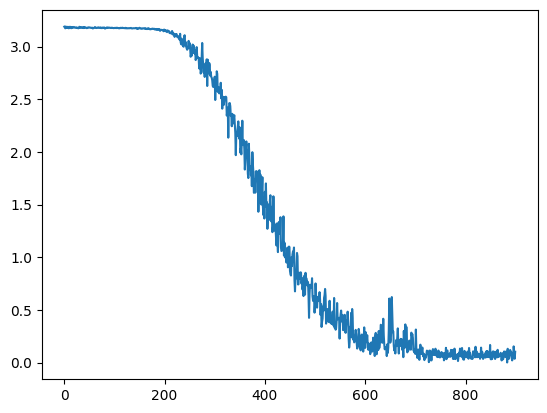

In [24]:
plt.plot(loss_history)

In [32]:
import pandas as pd

In [33]:
df = pd.read_csv(os.path.join(path, "train.csv"))
y = df.label

In [44]:
dr = cnn.train_debug(loader, y, epochs=500, lr=0.003, momentum=0.9)

<Axes: title={'center': 'loss over time'}, xlabel='epoch', ylabel='loss'>

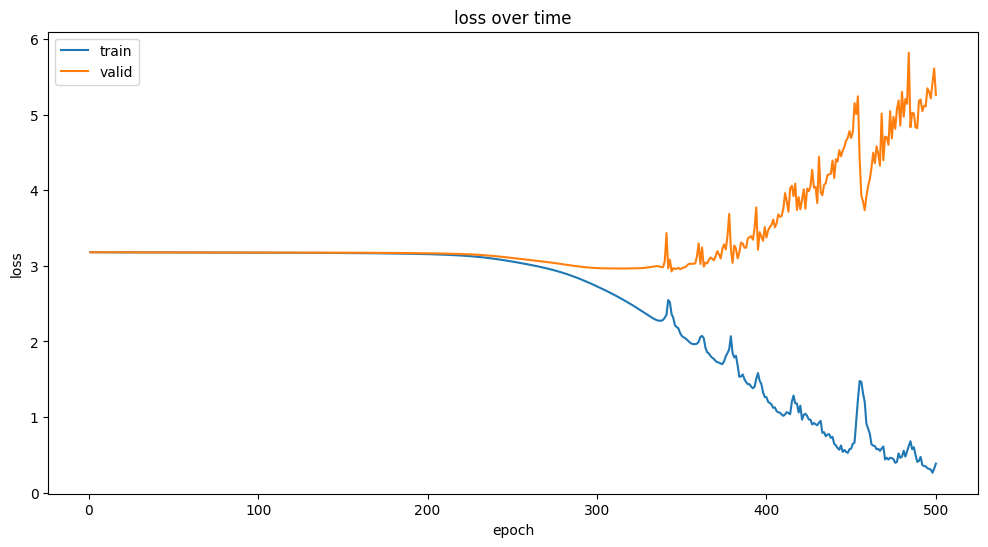

In [45]:
_, ax = plt.subplots(figsize=(12, 6))
dr.plot_loss(ax=ax)

In [76]:
import math 
dims = [5,31,32,64,96,128,256, 2339]

In [77]:
def filter_size(w, f, p=0, s=1):
    """
    Helper to sanity check filter output dimensions at runtime
    output_size = [ (W - F + 2P) / S ] + 1
    """
    return ((w - f + 2 * p) / s ) + 1

In [114]:
for dim in dims: 
    size = math.log2(dim/32)
    if size.is_integer(): 
        dyn_convs = []
        print(f"{dim}/{size}:")        
        new_size = dim
        for i in range(int(size)):                         
            dyn_convs.append("newConv2d")
            new_size = filter_size(new_size,8,s=2,p=3)
            print(" -"+str(new_size))

32/0.0:
64/1.0:
 -32.0
128/2.0:
 -64.0
 -32.0
256/3.0:
 -128.0
 -64.0
 -32.0


In [ ]:
scale = math.log2(dim/32)
if scale.is_integer(): 
    dyn_convs = []
    self.scale = scale

    for i in range(int(scale)):
        print(f"Creating dynamic filter for scaling @ {scale} pixels...")
        dyn_convs.append(nn.Conv2d(3,8,kernel_size=8,stride=2, padding=3))
        scale = filter_size(w=new_size,f=8,s=2,p=3)

60.0